In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
#import seaborn as sns

In [3]:
df_mad = pd.read_csv('../../data/raw/data_aemet/estacion_3195_data.csv')
df_bar = pd.read_csv('../../data/raw/data_aemet/estacion_0201X_data.csv')
df_hoyo = pd.read_csv('../../data/raw/Open_Meteo/daily/Hoyo de Manzanares/estacion_ESMAD_data.csv')

In [5]:
df_bar["tmed"].describe()

count     1258
unique     213
top       13,4
freq        22
Name: tmed, dtype: object

In [6]:
df_mad["tmed"] = df_mad["tmed"].str.replace(',', '.').astype(float)
df_mad["tmin"] = df_mad["tmin"].str.replace(',', '.').astype(float)
df_mad["tmax"] = df_mad["tmax"].str.replace(',', '.').astype(float)

In [7]:
df_bar["fecha"] = pd.to_datetime(df_bar["fecha"])

In [11]:
df_hoyo.columns


Index(['date', 'weather_code', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'year', 'month_number', 'month_name',
       'relative_humidity_2m', 'estación'],
      dtype='object')

In [38]:
df["tmed"].value_counts()

tmed
 9.8     30
 9.6     25
 11.2    25
 11.0    24
 10.4    24
         ..
-1.8      1
 31.3     1
 30.3     1
 28.3     1
 8.7      1
Name: count, Length: 305, dtype: int64

In [39]:
df = df.sort_values(by="fecha")

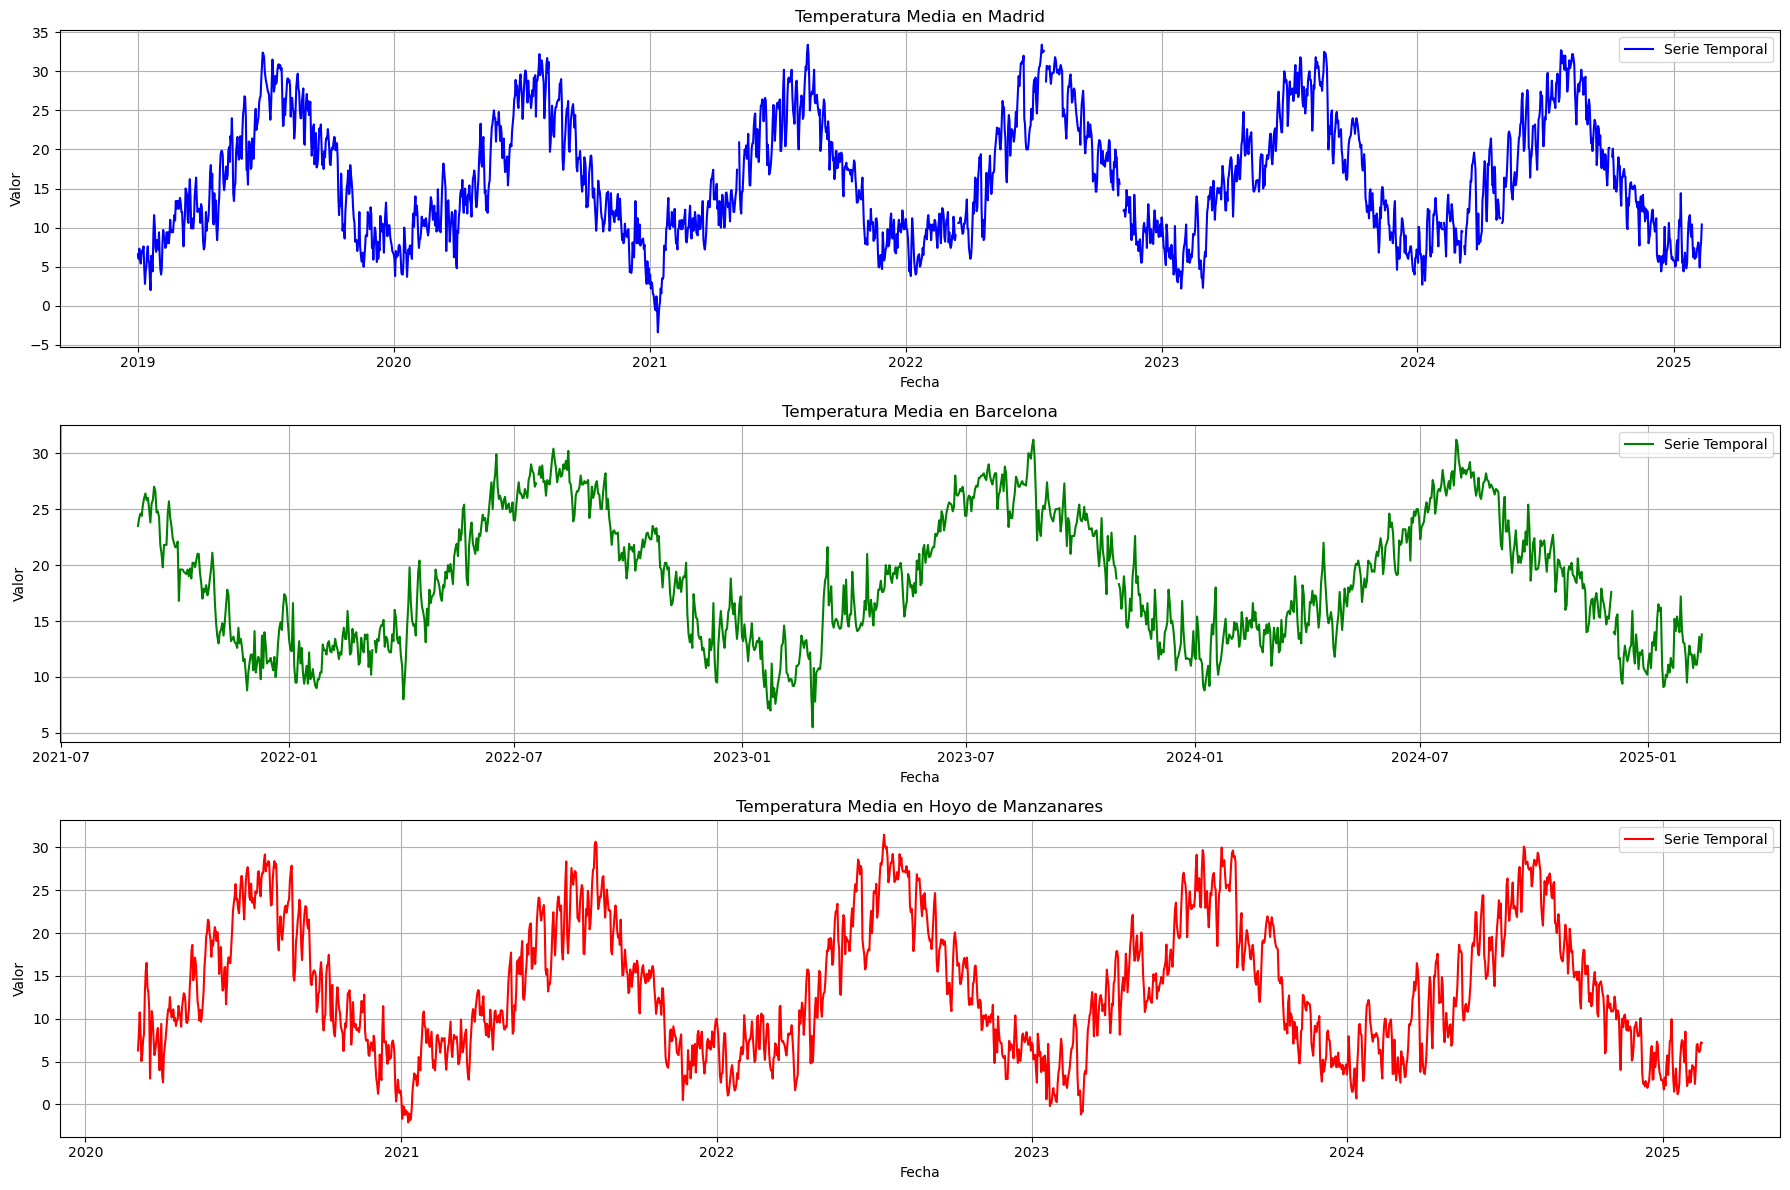

In [9]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(df_mad["fecha"], df_mad["tmed"], label="Serie Temporal", color="b")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Madrid")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(df_bar["fecha"], df_bar["tmed"], label="Serie Temporal", color="g")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Barcelona")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(df_hoyo["date"], df_hoyo["temperature_2m_mean"], label="Serie Temporal", color="r")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Temperatura Media en Hoyo de Manzanares")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

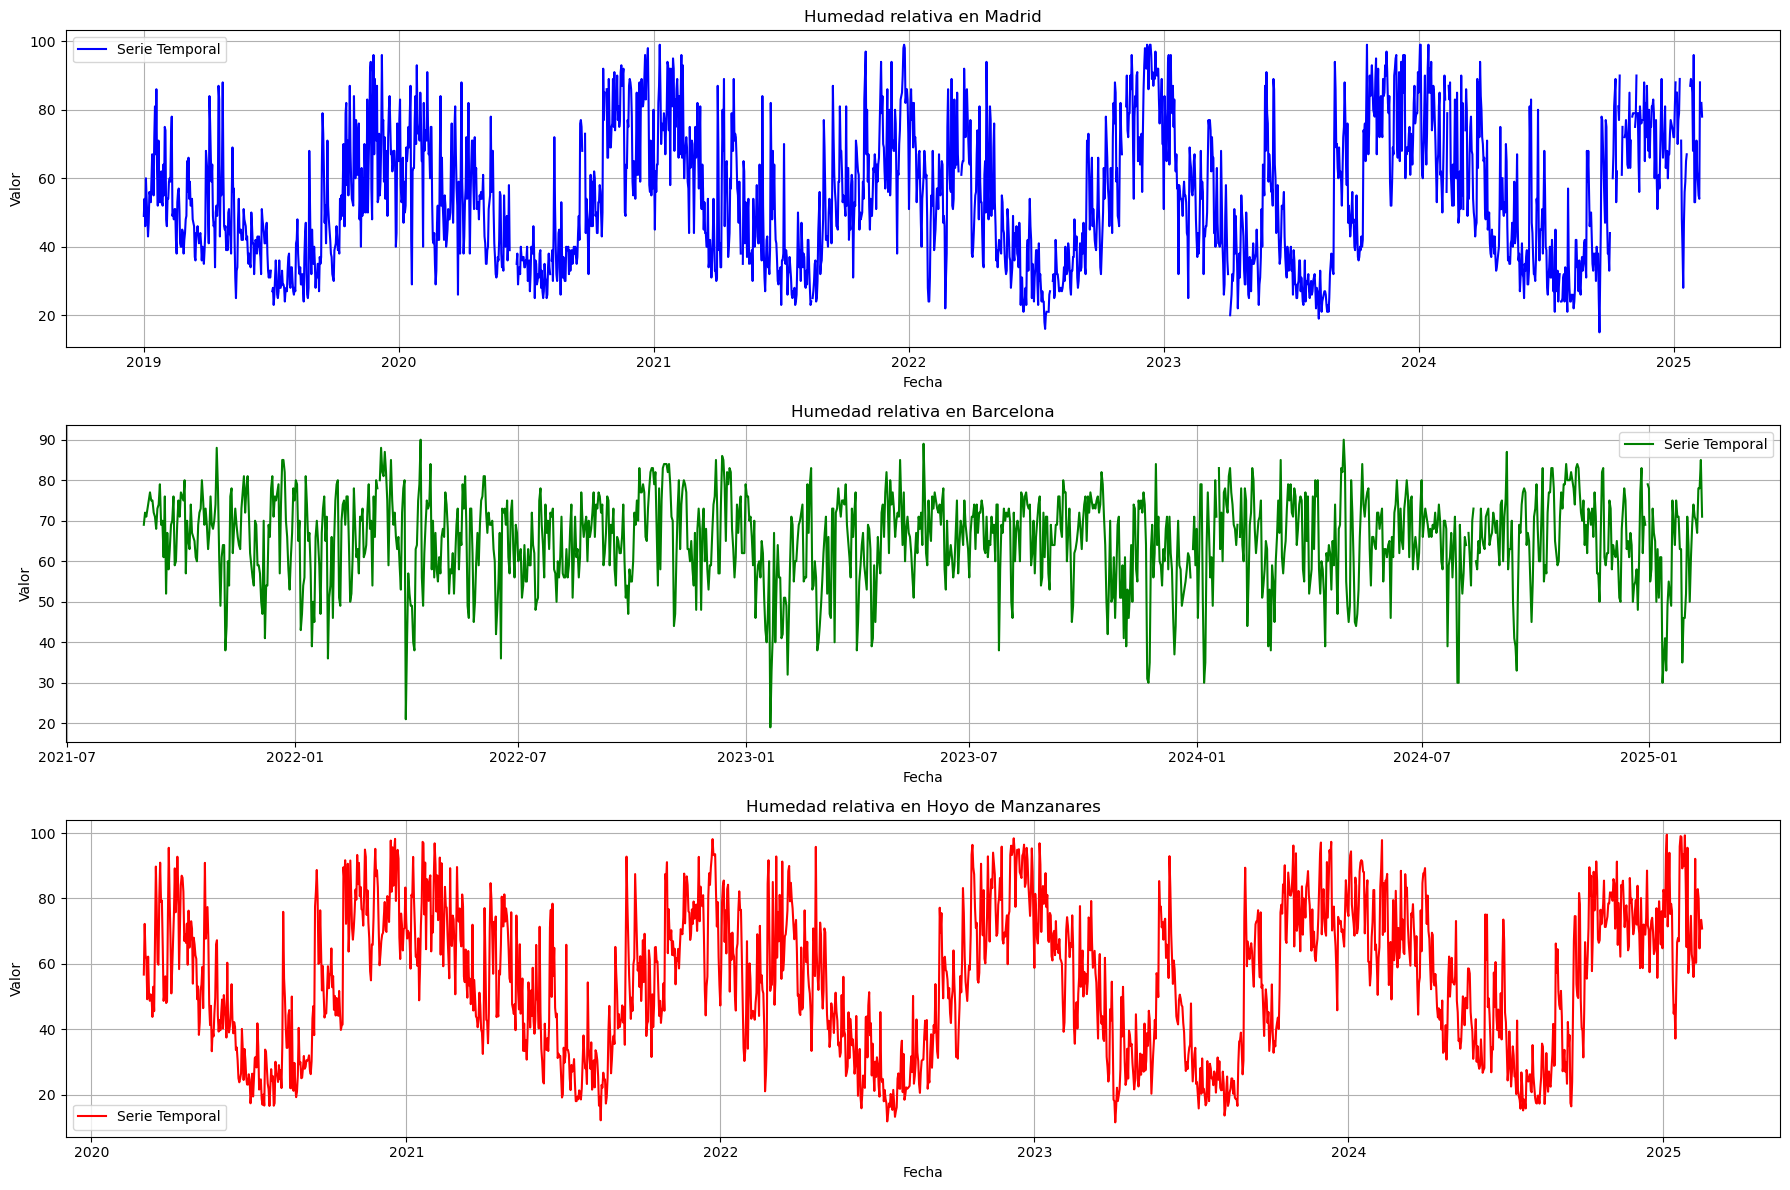

In [12]:
plt.figure(figsize=(18, 12))

plt.subplot(3, 1, 1)
plt.plot(df_mad["fecha"], df_mad["hrMedia"], label="Serie Temporal", color="b")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Madrid")
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(df_bar["fecha"], df_bar["hrMedia"], label="Serie Temporal", color="g")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Barcelona")
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(df_hoyo["date"], df_hoyo["relative_humidity_2m"], label="Serie Temporal", color="r")
plt.xlabel("Fecha")
plt.ylabel("Valor")
plt.title("Humedad relativa en Hoyo de Manzanares")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [41]:
df["tmed"].isna().sum()

np.int64(20)

In [42]:
df['tmed'] = df['tmed'].ffill()

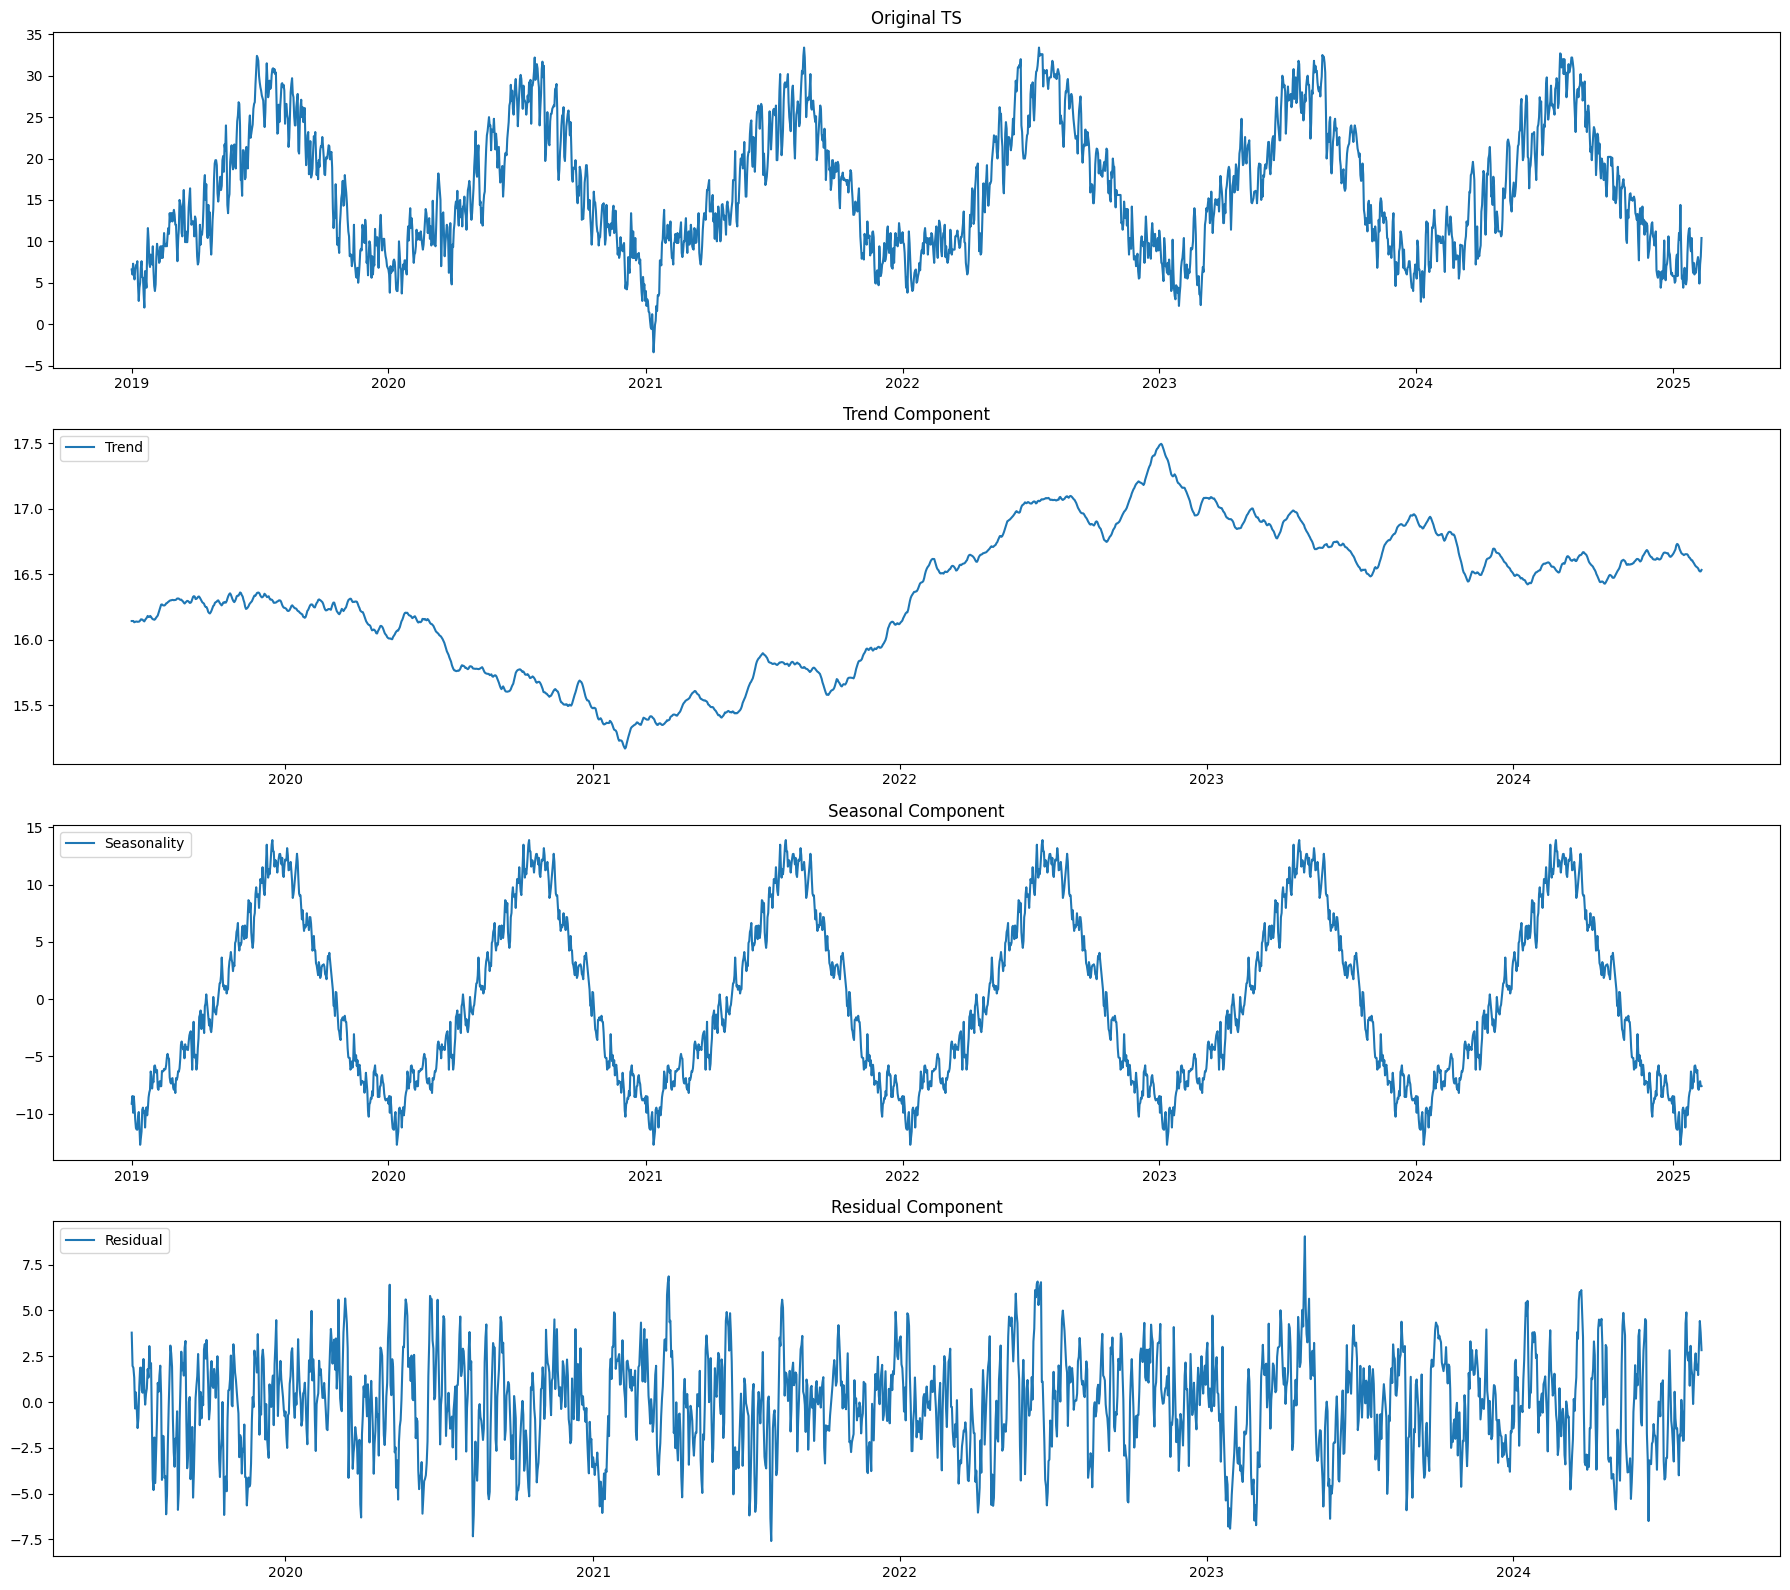

In [43]:
decomposition_air = seasonal_decompose(df['tmed'], model='additive', period=365)

plt.figure(figsize=(18, 16))

plt.subplot(4, 1, 1)
plt.plot(df["fecha"], df["tmed"])
plt.title('Original TS')

plt.subplot(4, 1, 2)
plt.plot(df["fecha"], decomposition_air.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(df["fecha"], decomposition_air.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(df["fecha"], decomposition_air.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

In [44]:
window = 30  # 30 days window
threshold = 3  # Threshold of 2 standard deviations

ma = df["tmed"].rolling(window=window, center=True).mean()
std = df["tmed"].rolling(window=window, center=True).std()

#Treshold min and max
threshold_min = ma - std*threshold 
threshold_max = ma + std*threshold 

#Outliers detection
df["outlier_ma"] = (np.abs(df["tmed"] - ma) > threshold * std)

In [45]:
df["outlier_ma"].value_counts()

outlier_ma
False    2233
Name: count, dtype: int64

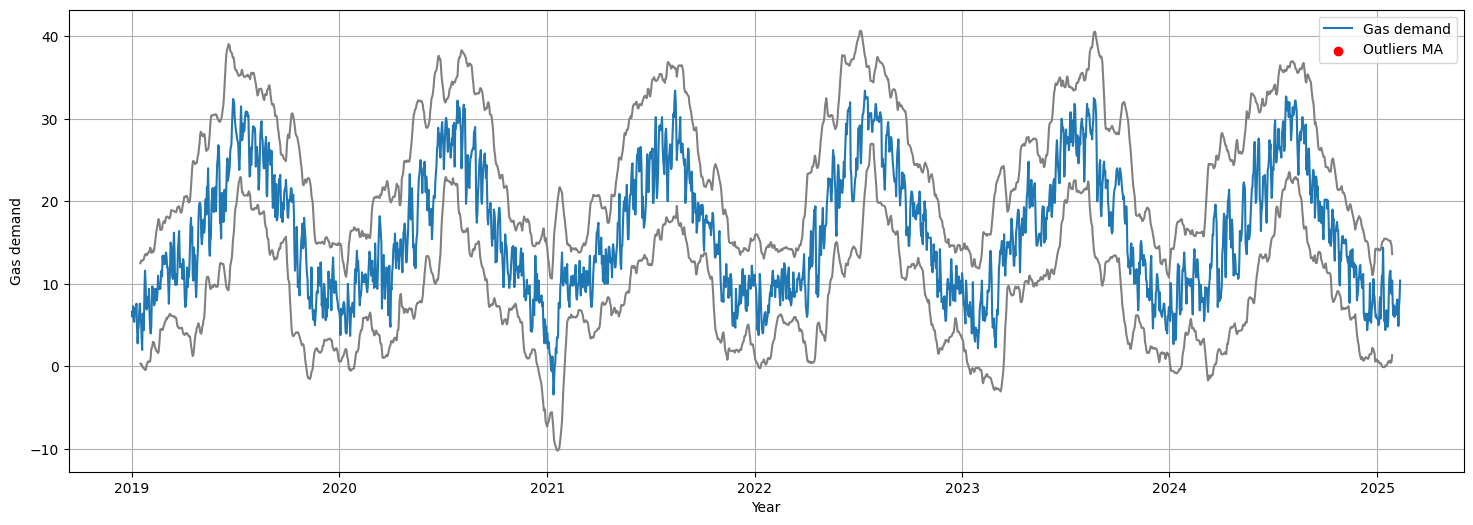

In [46]:
plt.figure(figsize=(18, 6))

plt.plot(df['fecha'], df['tmed'], label='Gas demand')
plt.plot(df['fecha'], threshold_min, color='gray')
plt.plot(df['fecha'], threshold_max, color='gray')
plt.scatter(df["fecha"][df["outlier_ma"]], df["tmed"][df["outlier_ma"]], color='red', label="Outliers MA")
plt.xlabel('Year')
plt.ylabel('Gas demand')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
df_temp_media = df[["fecha", "tmed"]].copy()

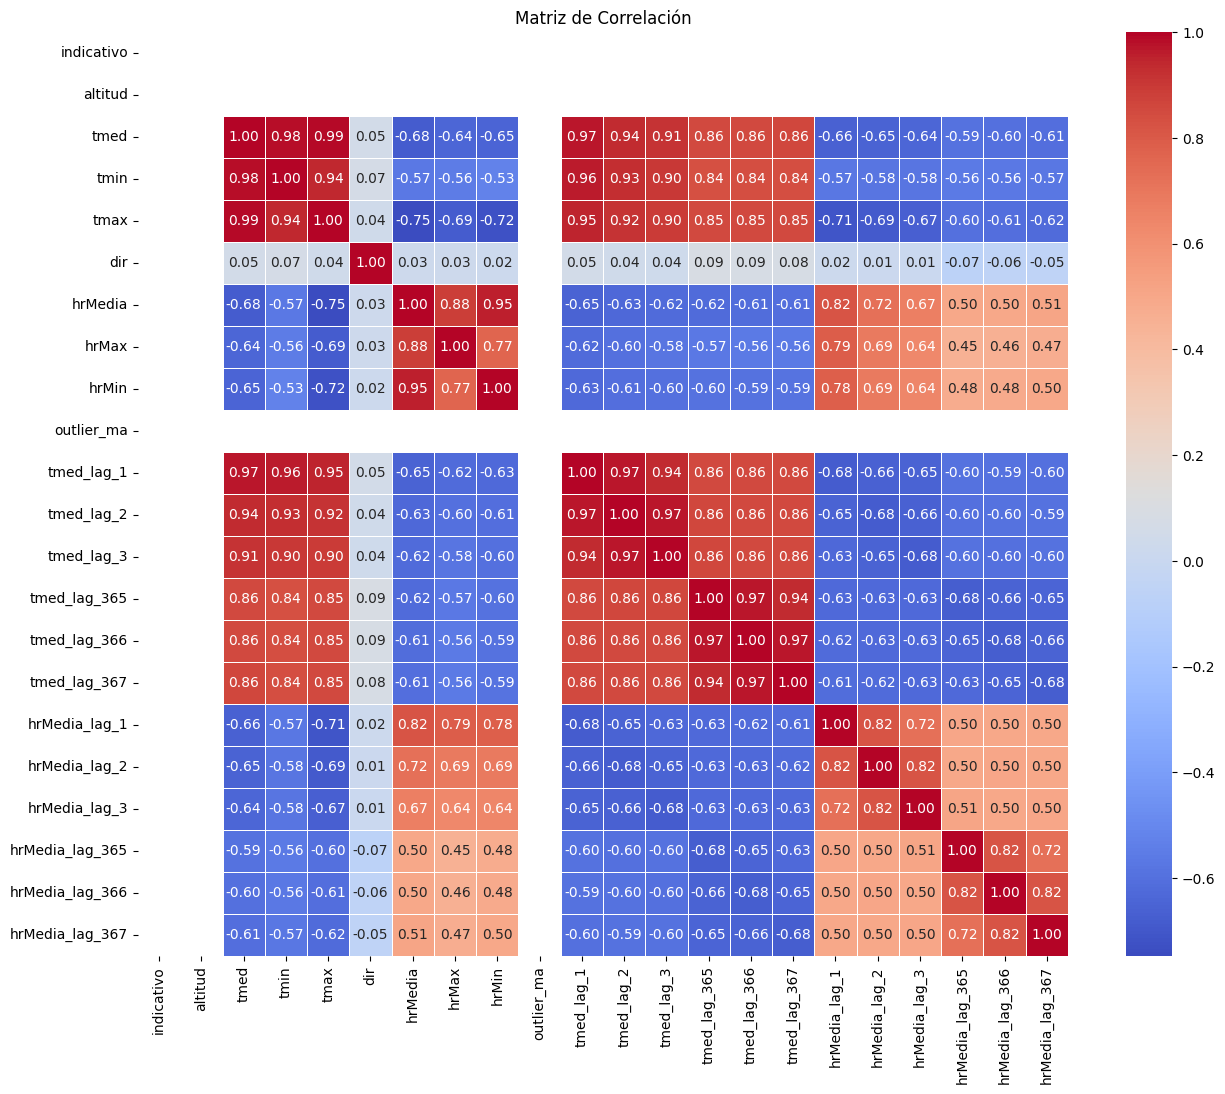

In [51]:
corr_matrix = df.corr(numeric_only=True)

# Crear el mapa de calor
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')

plt.show()

In [49]:
df['tmed_lag_1'] = df['tmed'].shift(1)
df['tmed_lag_2'] = df['tmed'].shift(2)
df['tmed_lag_3'] = df['tmed'].shift(3)
df['tmed_lag_365'] = df['tmed'].shift(365)
df['tmed_lag_366'] = df['tmed'].shift(366)
df['tmed_lag_367'] = df['tmed'].shift(367)
df['hrMedia_lag_1'] = df['hrMedia'].shift(1)
df['hrMedia_lag_2'] = df['hrMedia'].shift(2)
df['hrMedia_lag_3'] = df['hrMedia'].shift(3)
df['hrMedia_lag_365'] = df['hrMedia'].shift(365)
df['hrMedia_lag_366'] = df['hrMedia'].shift(366)
df['hrMedia_lag_367'] = df['hrMedia'].shift(367)

In [50]:
df.columns

Index(['fecha', 'indicativo', 'nombre', 'provincia', 'altitud', 'tmed', 'prec',
       'tmin', 'horatmin', 'tmax', 'horatmax', 'dir', 'velmedia', 'racha',
       'horaracha', 'presMax', 'horaPresMax', 'presMin', 'horaPresMin',
       'hrMedia', 'hrMax', 'horaHrMax', 'hrMin', 'horaHrMin', 'outlier_ma',
       'tmed_lag_1', 'tmed_lag_2', 'tmed_lag_3', 'tmed_lag_365',
       'tmed_lag_366', 'tmed_lag_367', 'hrMedia_lag_1', 'hrMedia_lag_2',
       'hrMedia_lag_3', 'hrMedia_lag_365', 'hrMedia_lag_366',
       'hrMedia_lag_367'],
      dtype='object')